Column names in dataset: Index(['Date', 'Price', 'Open', 'High', 'Low', 'Volume'], dtype='object')


<ipython-input-2-4aa8154c66c9>:12: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df[date_col] = pd.to_datetime(df[date_col], errors='coerce')


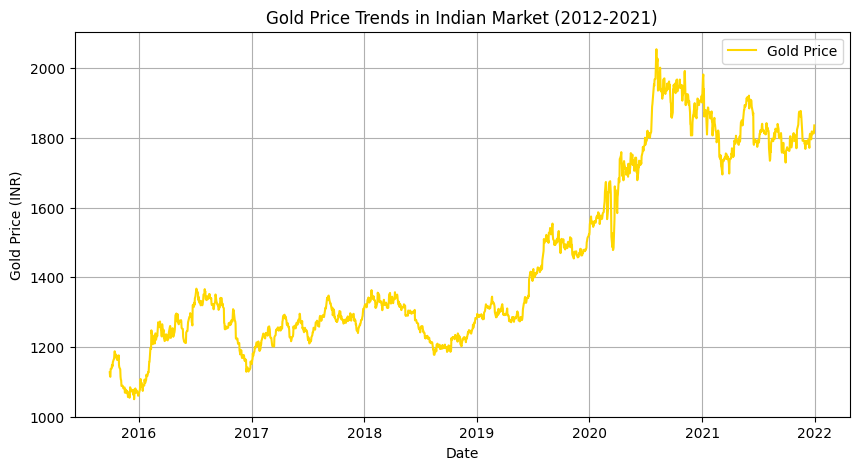

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("/content/gold_data.csv")

# Print column names to verify
print("Column names in dataset:", df.columns)

# Convert Date column to datetime (update the column name based on your dataset)
date_col = "Date"  # Change if your date column has a different name
df[date_col] = pd.to_datetime(df[date_col], errors='coerce')

# Check if 'Gold Price' exists, otherwise update with the correct column name
gold_price_col = "Price"  # Change based on actual column name from print(df.columns)

# Filter data for years (2012-2021)
df = df[(df[date_col].dt.year >= 2012) & (df[date_col].dt.year <= 2021)]

# Remove Outliers (Using IQR Method)
Q1 = df[gold_price_col].quantile(0.25)
Q3 = df[gold_price_col].quantile(0.75)
IQR = Q3 - Q1
df = df[(df[gold_price_col] >= (Q1 - 1.5 * IQR)) & (df[gold_price_col] <= (Q3 + 1.5 * IQR))]

# Plot Gold Prices Over Time
plt.figure(figsize=(10, 5))
plt.plot(df[date_col], df[gold_price_col], color='gold', label="Gold Price")
plt.xlabel("Date")
plt.ylabel("Gold Price (INR)")
plt.title("Gold Price Trends in Indian Market (2012-2021)")
plt.legend()
plt.grid()
plt.show()
